# Distribution Is All U Need

**distribution-is-all-you-need** is the basic distribution probability tutorial for **most common distribution focused on Deep learning** using python library.
For the convenience of copying code from this HTML, you can go to [this repo](https://github.com/zhaochenyang20/distirbution_is_all_you_need) to find the code, which was reformulated by [Eren, Zhao](https://zhaochenyang20.github.io/).

This article is originally written with Jupiter notebook, which is truly awesome that  I have long been looking down upon. I regret!

## Overview of distribution probability

![](https://zhaochenyang20.github.io/pic/lecture/2022_spring/distribution/overview.jpg)

- `conjugate` means it has relationship of **conjugate distributions**.

  > In [Bayesian probability](https://en.wikipedia.org/wiki/Bayesian_probability) theory, if the [posterior distributions](https://en.wikipedia.org/wiki/Posterior_probability) *p*(*θ* | *x*) are in the same [probability distribution family](https://en.wikipedia.org/wiki/List_of_probability_distributions) as the [prior probability distribution](https://en.wikipedia.org/wiki/Prior_probability_distribution) *p*(θ), the prior and posterior are then called **conjugate distributions,** and the prior is called a **conjugate prior** for the [likelihood function](https://en.wikipedia.org/wiki/Likelihood_function).
  > [Conjugate prior, wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior)
  
- `Multi-Class` means that Random Varivance are more than 2.

- `N Times` means that we also consider prior probability P(X). 

- To learn more about probability, I recommend reading [pattern recognition and machine learning, Bishop 2006].

# distribution probabilities and features

1. **Uniform distribution(continuous)**
   - Uniform distribution has same probaility value on [a, b], easy probability.

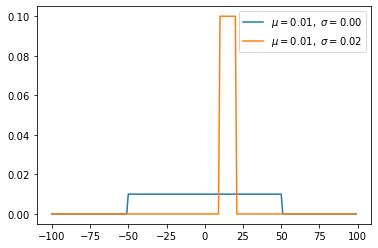

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def uniform(x, a, b):

    y = [1 / (b - a) if a <= val and val <= b
                    else 0 for val in x]

    return x, y, np.mean(y), np.std(y)

x = np.arange(-100, 100) # define range of x
for ls in [(-50, 50), (10, 20)]:
    a, b = ls[0], ls[1]
    x, y, u, s = uniform(x, a, b)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))

plt.legend()
plt.show()

2. **Bernoulli distribution(discrete)**

- Bernoulli distribution is not considered about prior probability P(X). Therefore, if we optimize to the maximum likelihood, we will be vulnerable to overfitting.
- We use **binary cross entropy** to classify binary classification. It has same form like taking a negative log of the bernoulli distribution.

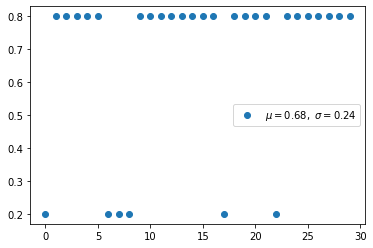

In [3]:
import random
import numpy as np
from matplotlib import pyplot as plt

n_experiment = 30
p = 0.8

def bernoulli(p, k):
    return p if k <= n_experiment * p else 1 - p

x = np.arange(n_experiment)
y = []
for _ in range(n_experiment):
    pick = bernoulli(p, k=random.randint(0, n_experiment + 1))
    y.append(pick)

u, s = np.mean(y), np.std(y)
plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.show()

3. **Binomial distribution(discrete)**,

- Binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments.
- Binomial distribution is distribution considered prior probaility by specifying the number to be picked in advance.

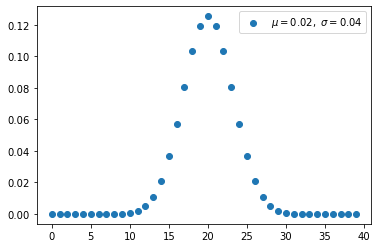

In [5]:
import numpy as np
from matplotlib import pyplot as plt

import operator as op
from functools import reduce

def const(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n-k)) for k in range(n)]
    return y, np.mean(y), np.std(y)

for ls in [(0.5, 40)]:
    p, n_experiment = ls[0], ls[1]
    x = np.arange(n_experiment)
    y, u, s = binomial(n_experiment, p)
    plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))

plt.legend()
plt.show()

4. **Multi-Bernoulli distribution, Categorical distribution(discrete)**

- Multi-bernoulli called categorical distribution, is a probability expanded more than 2.
- **cross entopy** has same form like taking a negative log of the Multi-Bernoulli distribution. 

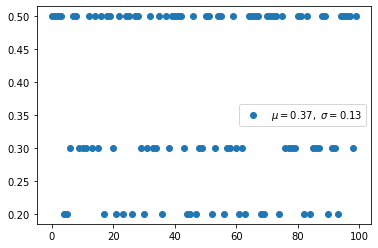

In [10]:
import random
import numpy as np
from matplotlib import pyplot as plt

n_experiment = 100
p = [0.2, 0.3, 0.5]
x = np.arange(n_experiment)
y = []

def categorical(p, k):
    if k <= n_experiment * p[0]:
        return p[0]
    elif k <= n_experiment * (p[0] + p[1]):
        return p[1]
    else:
        return p[2]


for _ in range(n_experiment):
    pick = categorical(p, k=random.randint(0, 100))
    y.append(pick)

u, s = np.mean(y), np.std(y)
plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.show()

5. **[Multinomial distribution(discrete)](https://math.fandom.com/zh/wiki/%E5%A4%9A%E9%A1%B9%E5%88%86%E5%B8%83?variant=zh)**

- The multinomial distribution has the same relationship with the categorical distribution as the relationship between Bernoull and Binomial.

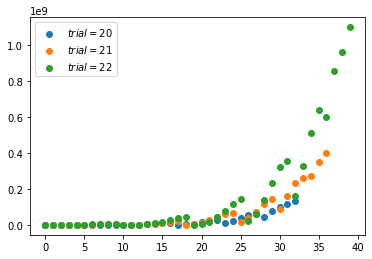

In [12]:
import numpy as np
from matplotlib import pyplot as plt

import operator as op
from functools import reduce

def factorial(n):
    return reduce(op.mul, range(1, n + 1), 1)

def const(n, a, b, c):
    """
        return n! / a! b! c!, where a+b+c == n
    """
    assert  a + b + c == n

    numer = factorial(n)
    denom = factorial(a) * factorial(b) * factorial(c)
    return numer / denom

def multinomial(n):
    """
    :param x : list, sum(x) should be `n`
    :param n : number of trial
    :param p: list, sum(p) should be `1`
    """
    # get all a,b,c where a+b+c == n, a<b<c
    ls = []
    for i in range(1, n + 1):
        for j in range(i, n + 1):
            for k in range(j, n + 1):
                if i + j + k == n:
                    ls.append([i, j, k])

    y = [const(n, l[0], l[1], l[2]) for l in ls]
    x = np.arange(len(y))
    return x, y, np.mean(y), np.std(y)

for n_experiment in [20, 21, 22]:
    x, y, u, s = multinomial(n_experiment)
    plt.scatter(x, y, label=r'$trial=%d$' % (n_experiment))

plt.legend()
plt.show()

6. **Beta distribution(continuous)**

- Beta distribution is conjugate to the binomial and Bernoulli distributions.
- Using conjucation, we can get the posterior distribution more easily using the prior distribution we know.
- Uniform distiribution is same when beta distribution met special case(alpha=1, beta=1).

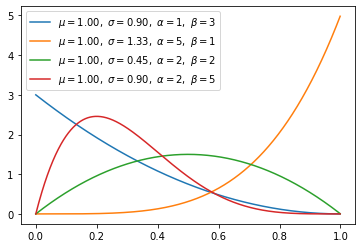

In [14]:
import numpy as np
from matplotlib import pyplot as plt

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def beta(x, a, b):

    gamma = gamma_function(a + b) / \
            (gamma_function(a) * gamma_function(b))
    y = gamma * (x ** (a - 1)) * ((1 - x) ** (b - 1))
    return x, y, np.mean(y), np.std(y)

for ls in [(1, 3), (5, 1), (2, 2), (2, 5)]:
    a, b = ls[0], ls[1]

    # x in [0, 1], trial is 1/0.001 = 1000
    x = np.arange(0, 1, 0.001, dtype=np.float64)
    x, y, u, s = beta(x, a=a, b=b)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \alpha=%d,\ \beta=%d$' % (u, s, a, b))
plt.legend()
plt.show()

7. **Dirichlet distribution(continuous)**

- Dirichlet distribution is conjugate to the MultiNomial distributions.
- If k=2, it will be Beta distribution.

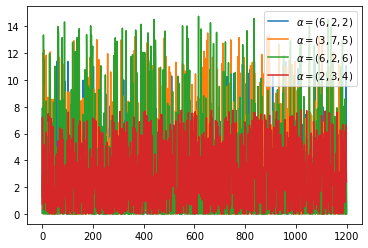

In [15]:
from random import randint
import numpy as np
from matplotlib import pyplot as plt

def normalization(x, s):
    """
    :return: normalizated list, where sum(x) == s
    """
    return [(i * s) / sum(x) for i in x]

def sampling():
    return normalization([randint(1, 100),
            randint(1, 100), randint(1, 100)], s=1)

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def beta_function(alpha):
    """
    :param alpha: list, len(alpha) is k
    :return:
    """
    numerator = 1
    for a in alpha:
        numerator *= gamma_function(a)
    denominator = gamma_function(sum(alpha))
    return numerator / denominator

def dirichlet(x, a, n):
    """
    :param x: list of [x[1,...,K], x[1,...,K], ...], shape is (n_trial, K)
    :param a: list of coefficient, a_i > 0
    :param n: number of trial
    :return:
    """
    c = (1 / beta_function(a))
    y = [c * (xn[0] ** (a[0] - 1)) * (xn[1] ** (a[1] - 1))
         * (xn[2] ** (a[2] - 1)) for xn in x]
    x = np.arange(n)
    return x, y, np.mean(y), np.std(y)

n_experiment = 1200
for ls in [(6, 2, 2), (3, 7, 5), (6, 2, 6), (2, 3, 4)]:
    alpha = list(ls)

    # random samping [x[1,...,K], x[1,...,K], ...], shape is (n_trial, K)
    # each sum of row should be one.
    x = [sampling() for _ in range(1, n_experiment + 1)]

    x, y, u, s = dirichlet(x, alpha, n=n_experiment)
    plt.plot(x, y, label=r'$\alpha=(%d,%d,%d)$' % (ls[0], ls[1], ls[2]))

plt.legend()
plt.show()

8. **Gamma distribution(continuous)**
   - Gamma distribution will be beta distribution, if `Gamma(a,1) / Gamma(a,1) + Gamma(b,1)` is same with `Beta(a,b)`.
   - The exponential distribution and chi-squared distribution are special cases of the gamma distribution.

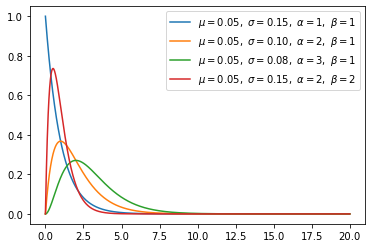

In [17]:
import numpy as np
from matplotlib import pyplot as plt

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def gamma(x, a, b):
    c = (b ** a) / gamma_function(a)
    y = c * (x ** (a - 1)) * np.exp(-b * x)
    return x, y, np.mean(y), np.std(y)

for ls in [(1, 1), (2, 1), (3, 1), (2, 2)]:
    a, b = ls[0], ls[1]

    x = np.arange(0, 20, 0.01, dtype=np.float64)
    x, y, u, s = gamma(x, a=a, b=b)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \alpha=%d,\ \beta=%d$' % (u, s, a, b))
plt.legend()
plt.show()

9. **Exponential distribution(continuous)**
   - Exponential distribution is special cases of the gamma distribution when alpha is 1.

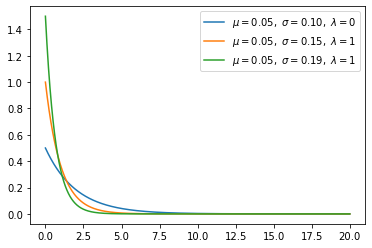

In [18]:
import numpy as np
from matplotlib import pyplot as plt

def exponential(x, lamb):
    y = lamb * np.exp(-lamb * x)
    return x, y, np.mean(y), np.std(y)

for lamb in [0.5, 1, 1.5]:

    x = np.arange(0, 20, 0.01, dtype=np.float64)
    x, y, u, s = exponential(x, lamb=lamb)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \lambda=%d$' % (u, s, lamb))
plt.legend()
plt.show()

10. **Gaussian distribution(continuous)**
    - Gaussian distribution is a very common continuous probability distribution
has heavier tails, meaning that it is more prone to producing values that fall far from its mean.

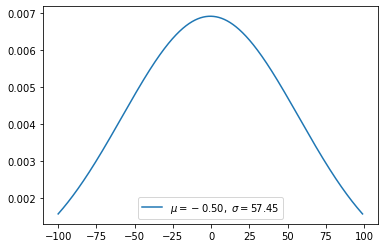

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def gaussian(x, n):
    u = x.mean()
    s = x.std()

    # divide [x.min(), x.max()] by n
    x = np.linspace(x.min(), x.max(), n)

    a = ((x - u) ** 2) / (2 * (s ** 2))
    y = 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-a)

    return x, y, x.mean(), x.std()

x = np.arange(-100, 100) # define range of x
x, y, u, s = gaussian(x, 10000)

plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.show()

11. **Normal distribution(continuous)**
    - Normal distribution is standarzed Gaussian distribution, it has 0 mean and 1 std.

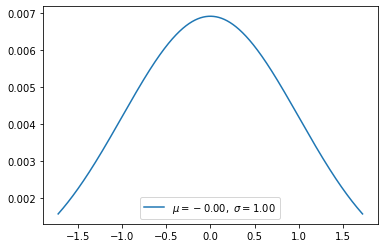

In [20]:
import numpy as np
from matplotlib import pyplot as plt

def normal(x, n):
    u = x.mean()
    s = x.std()

    # normalization
    x = (x - u) / s

    # divide [x.min(), x.max()] by n
    x = np.linspace(x.min(), x.max(), n)

    a = ((x - 0) ** 2) / (2 * (1 ** 2))
    y = 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-a)

    return x, y, x.mean(), x.std()

x = np.arange(-100, 100) # define range of x
x, y, u, s = normal(x, 10000)

plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.show()

12. **Chi-squared distribution(continuous)**
    - Chi-square distribution with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables.
    - Chi-square distribution is special case of Beta distribution

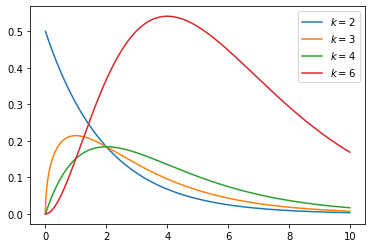

In [22]:
import numpy as np
from matplotlib import pyplot as plt

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def chi_squared(x, k):

    c = 1 / (2 ** (k/2)) * gamma_function(k//2)
    y = c * (x ** (k/2 - 1)) * np.exp(-x /2)

    return x, y, np.mean(y), np.std(y)

for k in [2, 3, 4, 6]:
    x = np.arange(0, 10, 0.01, dtype=np.float64)
    x, y, _, _ = chi_squared(x, k)
    plt.plot(x, y, label=r'$k=%d$' % (k))

plt.legend()
plt.show()

13. **Student-t distribution(continuous)**
    - The t-distribution is symmetric and bell-shaped, like the normal distribution, but 

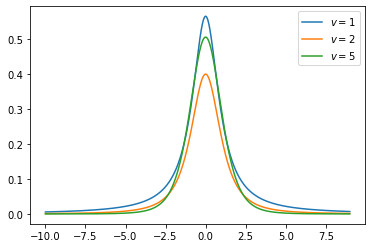

In [23]:
import numpy as np
from matplotlib import pyplot as plt

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def student_t(x, freedom, n):

    # divide [x.min(), x.max()] by n
    x = np.linspace(x.min(), x.max(), n)

    c = gamma_function((freedom + 1) // 2) \
        / np.sqrt(freedom * np.pi) * gamma_function(freedom // 2)
    y = c * (1 + x**2 / freedom) ** (-((freedom + 1) / 2))

    return x, y, np.mean(y), np.std(y)

for freedom in [1, 2, 5]:

    x = np.arange(-10, 10) # define range of x
    x, y, _, _ = student_t(x, freedom=freedom, n=10000)
    plt.plot(x, y, label=r'$v=%d$' % (freedom))

plt.legend()
plt.show()

# Author

If you would like to see the details about relationship of distribution probability, please refer to [this](https://en.wikipedia.org/wiki/Relationships_among_probability_distributions).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Relationships_among_some_of_univariate_probability_distributions.jpg/2880px-Relationships_among_some_of_univariate_probability_distributions.jpg)

- Tae Hwan Jung [@graykode](https://github.com/graykode), Kyung Hee Univ CE(Undergraduate).
- Author Email : [nlkey2022@gmail.com](mailto:nlkey2022@gmail.com)
- [Zhao Chen Yang](https://zhaochenyang20.github.io/)
- Refactored this repo in Spring 2022, during Qingming Festival, at Tsinghua University.